In [1]:
#Predictiong heart disease using machine learning
#This notebook looks to using various Python based machine learning and data science libraries in an attempt to build a machine learning capable of predicting whether or not someone has heart disease on their medical attributes or not



In [2]:
#We are going to take the following apprach:
#1. Probelm definition
#2. DATA
#3. Evaluation
#4. Features
#5. Modeling
#6. Experimentaion

In [3]:
#1.Problem Definition
#We should be able to predict whether a person is having heart disease or not

In [4]:
#2. DATA
# The original data came from the UCI Machine Learning Repo. https://archive.ics.uci.edu/dataset/45/heart+disease
# The data is also available at the kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [5]:
#3. Evaluation
#If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

In [20]:
#4. Features
#This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

#We got it from the kaggle
#Create data dictionary

# age - age in years
# sex - (1 = male; 0 = female)
# cp - chest pain type
# 0: Typical angina: chest pain related decrease blood supply to the heart
# 1: Atypical angina: chest pain not related to heart
# 2: Non-anginal pain: typically esophageal spasms (non heart related)
# 3: Asymptomatic: chest pain not showing signs of disease
# trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
# chol - serum cholestoral in mg/dl
# serum = LDL + HDL + .2 * triglycerides
# above 200 is cause for concern
# fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# '>126' mg/dL signals diabetes
# restecg - resting electrocardiographic results
# 0: Nothing to note
# 1: ST-T Wave abnormality
# can range from mild symptoms to severe problems
# signals non-normal heart beat
# 2: Possible or definite left ventricular hypertrophy
# Enlarged heart's main pumping chamber
# thalach - maximum heart rate achieved
# exang - exercise induced angina (1 = yes; 0 = no)
# oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
# slope - the slope of the peak exercise ST segment
# 0: Upsloping: better heart rate with excercise (uncommon)
# 1: Flatsloping: minimal change (typical healthy heart)
# 2: Downslopins: signs of unhealthy heart
# ca - number of major vessels (0-3) colored by flourosopy
# colored vessel means the doctor can see the blood passing through
# the more blood movement the better (no clots)
# thal - thalium stress result
# 1,3: normal
# 6: fixed defect: used to be defect but ok now
# 7: reversable defect: no proper blood movement when excercising
# target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [7]:
#Prepare the tools

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#we want to show the matplotlib inside the notebook

#from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
print('Hello')

Hello


In [22]:
#.Load Data
#Data Exploration (EDA 0r exploratory Data Analysis)
#Knowing the more about the data
#The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

# What question(s) are you trying to solve?
# What kind of data do we have and how do we treat different types?
# What's missing from the data and how do you deal with it?
# Where are the outliers and why should you care about them?
# How can you add, change or remove features to get more out of your data?
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#Lets find out how many classes are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

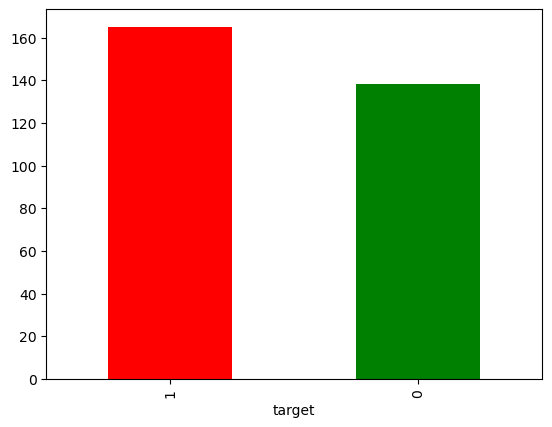

In [32]:
#lets visualise it
df["target"].value_counts().plot(kind="bar", color =["red", "green"]);

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [47]:
#compare the both the sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


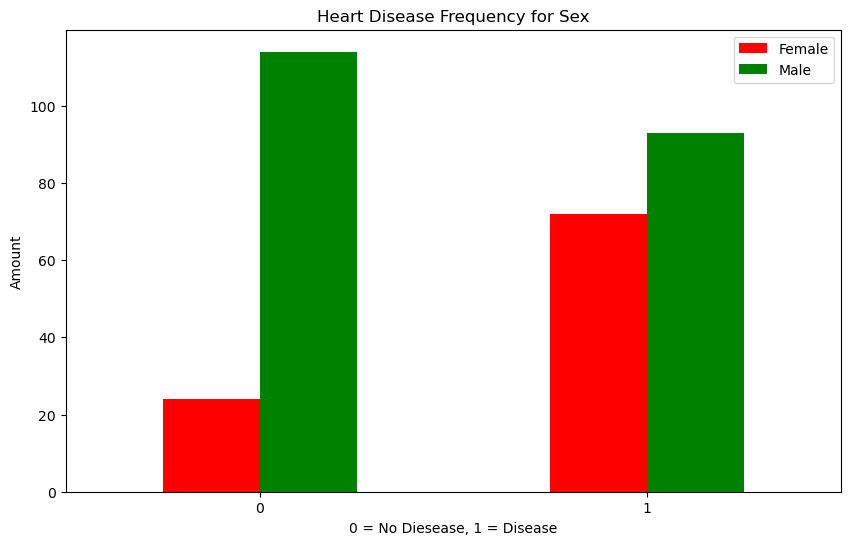

In [54]:
pd.crosstab(df.target, df.sex).plot(kind ="bar", color=["red", "green"], figsize =(10,6))
plt.xticks(rotation =0);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
#xticks is basically for turning the x axis value by 90 degree

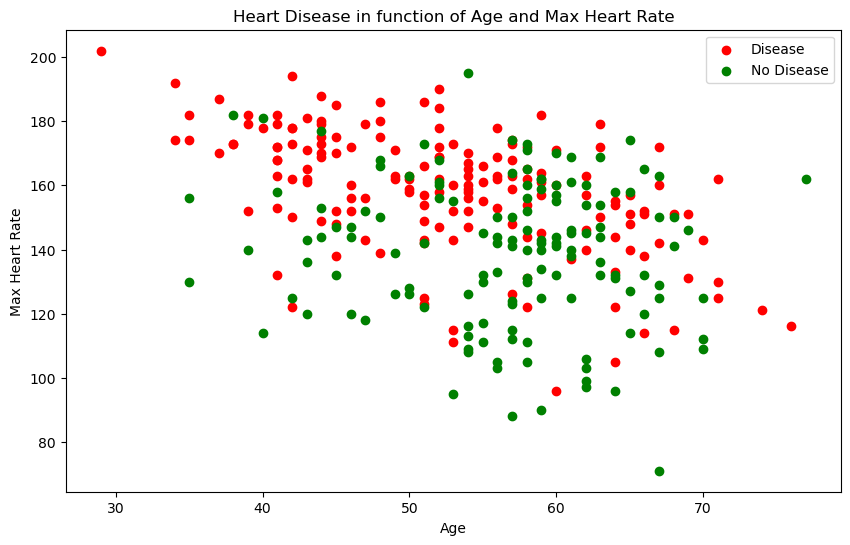

In [60]:
#Create another figure
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="red");
#scatter with positive examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="green");
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

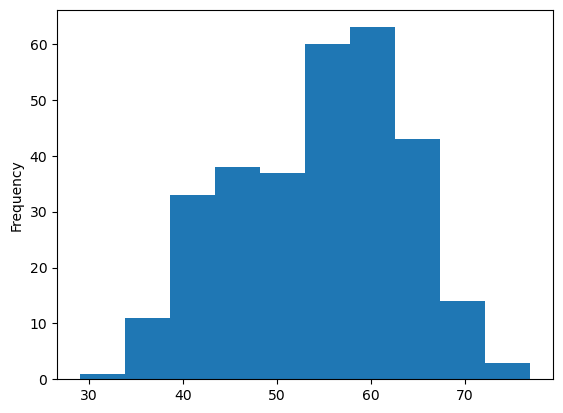

In [63]:
df.age.plot.hist();

In [65]:
##Heart disease Frequency per chest pain type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

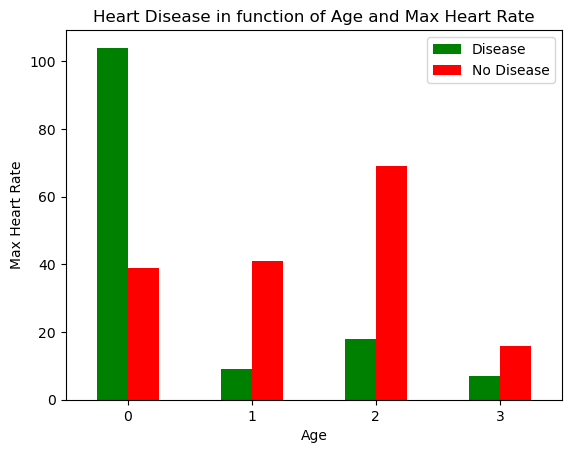

In [71]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  color=["green","red"])
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
plt.xticks(rotation =0)

In [73]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


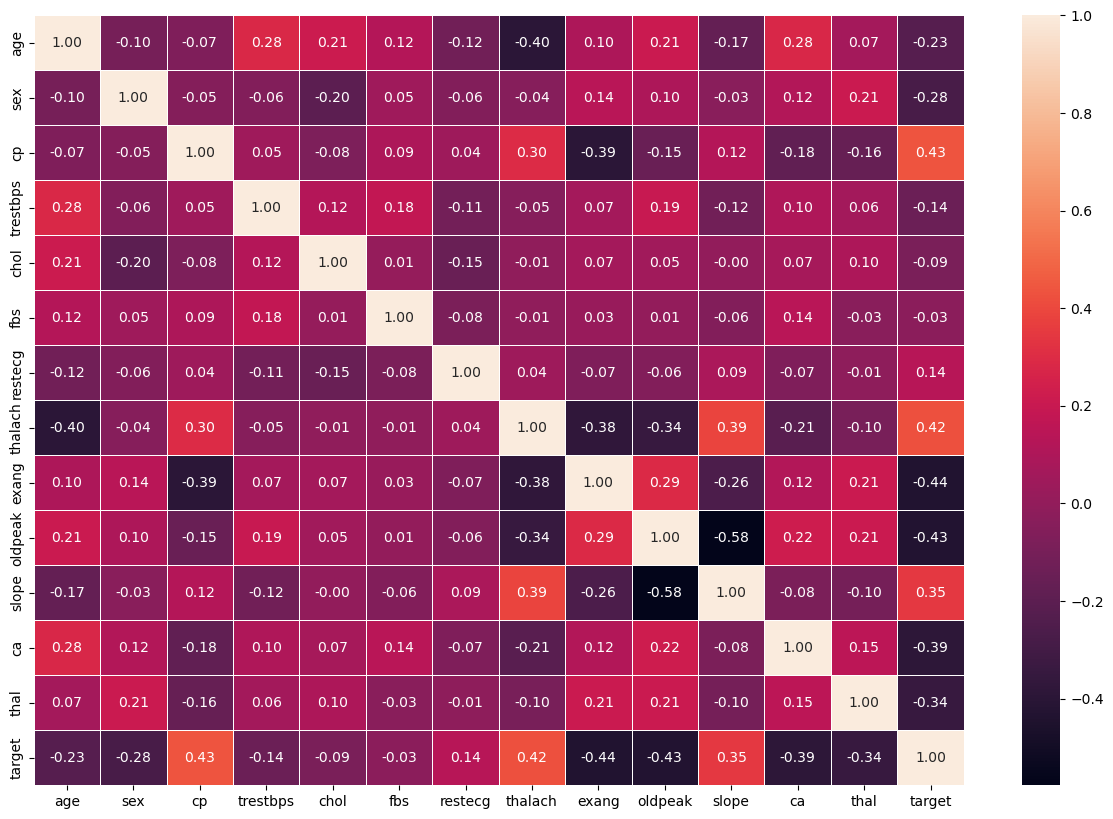

In [80]:
#Correlation matrix visuals
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt =".2f")

In [82]:
#5. Modelling the data

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
X = df.drop("target", axis=1)
Y = df["target"]

In [89]:
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [91]:
clf.score(X_test, Y_test)

0.8524590163934426

In [92]:
# We are going three different models here
#1. Logistic Regression
#2. K-Nearest Neighbours Classifier
#3. Random Forest Classifier (already used above)

In [104]:
#Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
         }
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    '''
    Fit and evaluate given machine learning models
    '''
    np.random.seed(42)
    #make a dict to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [106]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             Y_train = Y_train,
                             Y_test = Y_test)
model_scores

/Users/admin/Desktop/sample_project/Heart_Disease_Project/eve/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

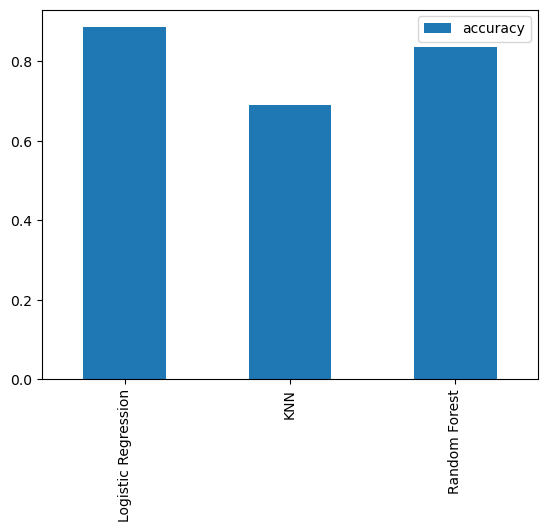

In [110]:

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [112]:
#Now we have a baseline model
#Lets look at the following
#Hyperterparameter tuning
#Features importance
# Confusion Matrix
#Cross - validation
#Precision
#Recall
#F1 Score
#Classification report
#ROC curve
#Area under the curve(AUC)

In [114]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))

Maximum KNN score on the test data: 75.41%


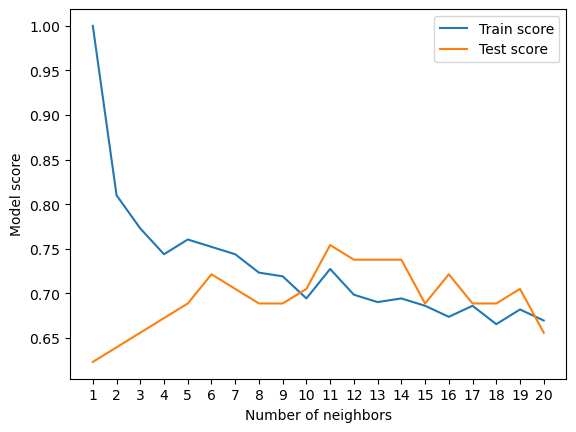

In [115]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [116]:
#randomizedSearchCV

In [118]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [121]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [123]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [153]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [154]:
# Confusion matrix
print(confusion_matrix(Y_test, rs_log_reg.predict(X_test)))

[[25  4]
 [ 3 29]]


In [128]:
#GridSearchCV

In [143]:
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);
gs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [142]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [152]:
print(classification_report(Y_test, gs_log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [155]:
## Calculate evaluation metrics using cross-validation
#by using cross_val_score()

In [157]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [159]:
#Create a new classifier with best parameter

In [171]:
clf = LogisticRegression(C=0.23357214690901212, solver= 'liblinear')
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring = "accuracy")
cv_accuracy = np.mean(cv_acc)
cv_accuracy

0.8479781420765027

In [166]:
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring = "precision")
cv_acc_precision= np.mean(cv_acc)
cv_acc_precision

0.8215873015873015

In [168]:
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring = "recall")
cv_acc_recall= np.mean(cv_acc)
cv_acc_recall

0.9272727272727274

In [172]:
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring = "f1")
cv_acc_f1= np.mean(cv_acc)
cv_acc_f1

0.8705403543192143

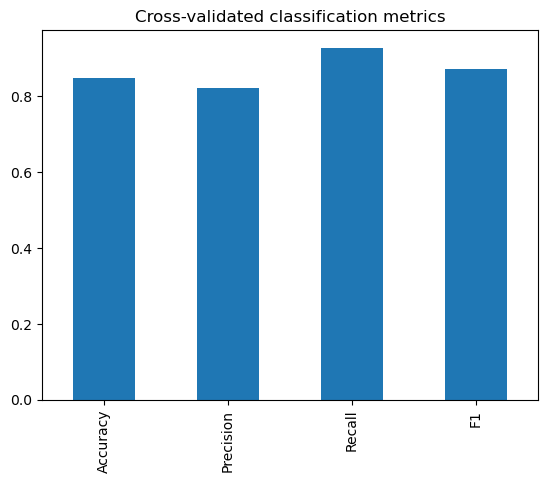

In [179]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                           "Precision": cv_acc_precision,
                           "Recall": cv_acc_recall,
                           "F1": cv_acc_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [180]:
#Feature Importance

In [185]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Feature Importance
# Feature importance is another as asking "which features contributed most to the outcomes of the model and how did they contribute"

In [188]:
clf = LogisticRegression(C=0.23357214690901212, solver= 'liblinear')
clf.fit(X_train, Y_train)
#Check COEF
clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590907,
         0.47095114, -0.65165351, -0.699842  ]])

In [193]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0036992183633085857,
 'sex': -0.9042408474114028,
 'cp': 0.6747282820013463,
 'trestbps': -0.01161340415475584,
 'chol': -0.0017036448092066976,
 'fbs': 0.04787689082536315,
 'restecg': 0.33490184455843097,
 'thalach': 0.02472938514033986,
 'exang': -0.6312040052639052,
 'oldpeak': -0.5759090719885068,
 'slope': 0.4709511397091774,
 'ca': -0.6516535119713651,
 'thal': -0.6998419972478845}

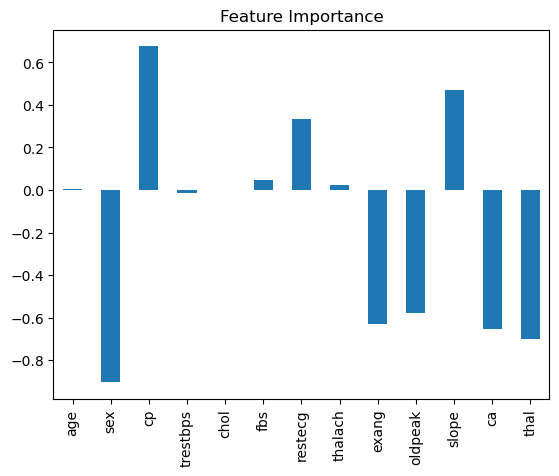

In [194]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);